# Pymaceuticals, Inc. Analysis

## Data Cleaning

In [1]:
# set up
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# combine the data into a single dataframe
mouse_study = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how="left")

# display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# check the total number of mice in the study
mouse_study["Mouse ID"].nunique()

249

In [3]:
# find the duplicate mice by id number that shows up for Mouse ID and Timepoint
duplicates = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# list all the data for the duplicate mouse (ID= g989)
mouse_study_dup = mouse_study.loc[mouse_study["Mouse ID"] == "g989"]
mouse_study_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# create a clean dataframe after dropping the duplicate mouse
mouse_study = mouse_study.drop(mouse_study[mouse_study['Mouse ID'] == "g989"].index)
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# checking the number of mice subjects in the clean dataframe
mouse_study["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# generate a summary table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen

# use groupby and summary statistical methods to calculate the following properties of each drug regimen 
regimen_mean = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
regimen_median = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
regimen_var = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
regimen_std = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
regimen_sem = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# assemble the resulting series into one summary dataframe
regimen_summary = pd.DataFrame({"Mean Tumor Volume": regimen_mean,
                                "Median Tumor Volume": regimen_median,
                                "Tumor Volume Variance": regimen_var,
                                "Tumor Volume Std. Dev.": regimen_std ,
                                "Tumor Volume Std. Err.": regimen_sem})
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# a more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# using the aggregation method, produce the same summary statistics in a single line
regimen_summary_alt = mouse_study.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": 
                                                                 ["mean", "median", "var", "std", "sem"]})
regimen_summary_alt

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

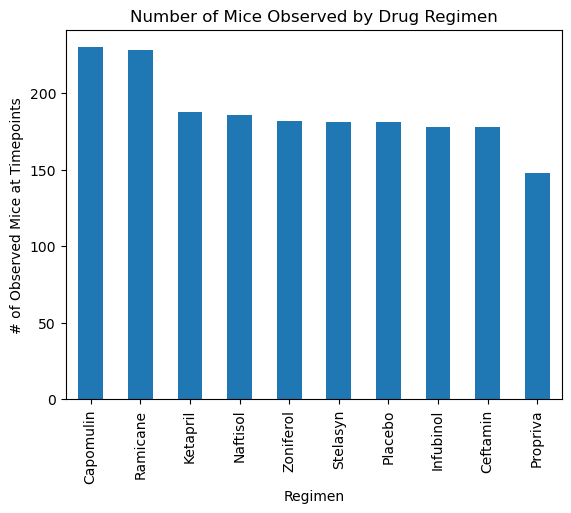

In [9]:
# generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pandas
regimen_counts = mouse_study["Drug Regimen"].value_counts()
count_chart = regimen_counts.plot(kind="bar",
                                  title="Number of Mice Observed by Drug Regimen",
                                  xlabel="Regimen",
                                  ylabel="# of Observed Mice at Timepoints")
plt.show()

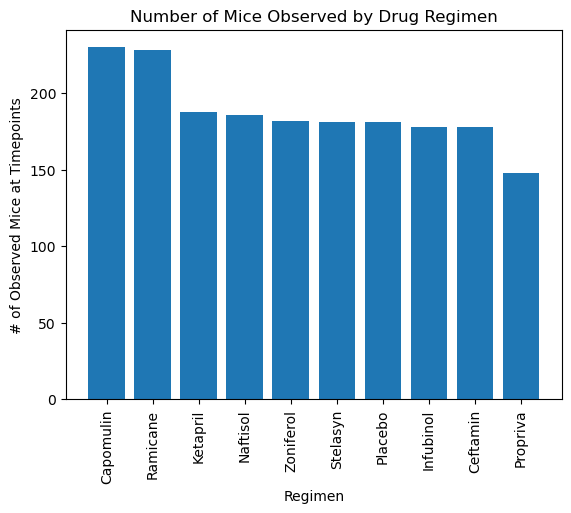

In [10]:
# generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
mice_count = mouse_study["Drug Regimen"].value_counts()
x_axis = np.arange(len(mice_count))
plt.bar(x_axis, mice_count)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_count.index.values)
plt.xlabel("Regimen")
plt.xticks(rotation="vertical")
plt.ylabel("# of Observed Mice at Timepoints")
plt.title("Number of Mice Observed by Drug Regimen")
plt.show()

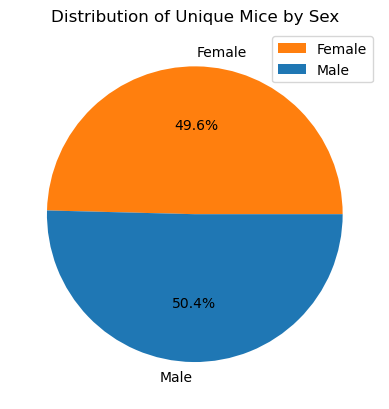

In [11]:
# generate a pie plot showing the distribution of female versus male mice using pandas 
# (unique numbers of male and female mice)
number_by_sex = mouse_study.groupby(["Sex"])["Mouse ID"].nunique()
sex_nu = pd.DataFrame({"Sex": number_by_sex})
colors = ["tab:orange", "tab:blue"]
sex_nu_chart = sex_nu.plot(kind="pie", y="Sex", autopct="%.1f%%", colors = colors, title='Distribution of Unique Mice by Sex')
sex_nu_chart.set_ylabel('')
plt.show()

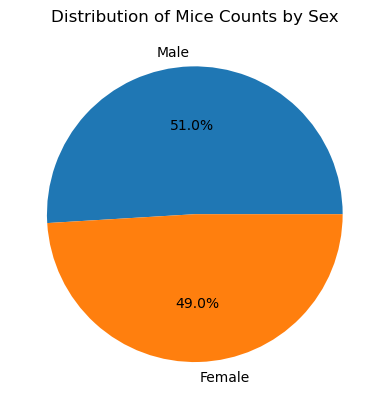

In [12]:
# generate a pie plot showing the distribution of female versus male mice using pandas 
# (total male and female mice counts)
count_by_sex = mouse_study["Sex"].value_counts()
sex_co_chart = count_by_sex.plot(kind="pie", y="Sex", autopct="%.1f%%", 
                                 title='Distribution of Mice Counts by Sex')
sex_co_chart.set_ylabel('')
plt.show()

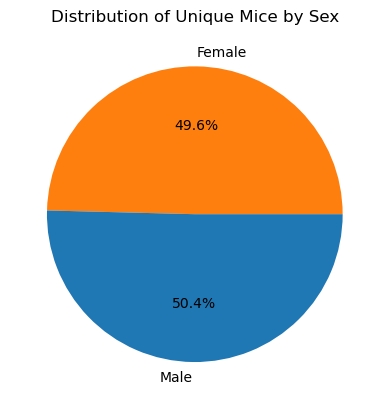

In [13]:
# generate a pie plot showing the distribution of female versus male mice using pyplot
# (unique numbers of male and female mice)
plt.pie(number_by_sex, labels=number_by_sex.index.values, autopct="%1.1f%%", colors=colors)
plt.title("Distribution of Unique Mice by Sex")
plt.show()

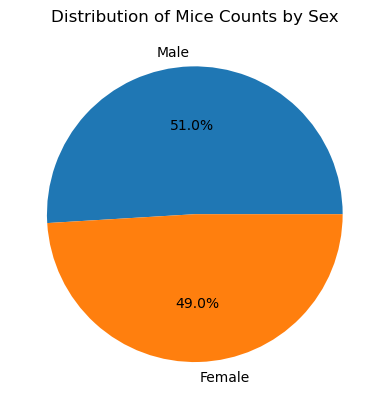

In [14]:
# generate a pie plot showing the distribution of female versus male mice using pyplot
# (total male and female mice counts)
plt.pie(count_by_sex, labels=count_by_sex.index.values, autopct="%1.1f%%")
plt.title("Distribution of Mice Counts by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# start by getting the last (greatest) timepoint for each mouse
max_tp = pd.DataFrame(mouse_study.groupby(["Mouse ID"])["Timepoint"].max()).rename(columns={"Timepoint": "max_timepoint"})

# merge this group df with the original dataFrame to get the tumor volume at the last timepoint
tv_max_tp = pd.merge(mouse_study, max_tp, on="Mouse ID")
tv_max_tp.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
5,b128,25,43.262145,1,Capomulin,Female,9,22,45
6,b128,30,40.605335,1,Capomulin,Female,9,22,45
7,b128,35,37.967644,1,Capomulin,Female,9,22,45
8,b128,40,38.379726,2,Capomulin,Female,9,22,45
9,b128,45,38.982878,2,Capomulin,Female,9,22,45


In [16]:
# prepare the final tumor volumes by treatment regimen data to plot

# first, put treatments into a list for for loop (and later for plot labels)
tx = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# create an empty list to fill with tumor volume data (for plotting)
tv_by_tx = []

# loop through each drug of interest in the merged dataset
for drug in tx:
    
    # locate the rows that contain mice on each drug
    drug_df = tv_max_tp.loc[tv_max_tp["Drug Regimen"] == drug]
    
    # obtain the tumor volume at final timepoint for each mouse within a specific drug
    final_tv = drug_df.loc[drug_df["Timepoint"] == drug_df["max_timepoint"]]
    tv = final_tv["Tumor Volume (mm3)"]
        
    # add the final tumor volumes to the list for plotting
    tv_by_tx.append(tv)
    
    # calculate the IQR
    quartiles = tv.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # determine outliers by setting lower and upper bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # quantitatively determine if there are any potential outliers
    outliers = tv.loc[(final_tv["Tumor Volume (mm3)"] <= lower_bound) |
                             (final_tv["Tumor Volume (mm3)"] >= upper_bound)]
    outliers_count = outliers.count()
    print(f"Potential outliers in {drug} group: count ({outliers_count}); {outliers}")

IQR for Capomulin: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Potential outliers in Capomulin group: count (0); Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Ramicane: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Potential outliers in Ramicane group: count (0); Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Infubinol: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Potential outliers in Infubinol group: count (1); 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
IQR for Ceftamin: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Potential outliers in Ceftamin group: count (0); Series([], Name: Tumor Volume (mm3), dtype: float64)


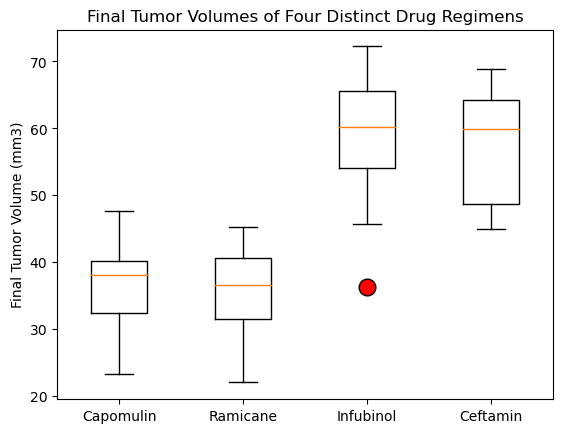

In [17]:
# generate a box plot that shows the distrubution of the tumor volume for each treatment group
plt.boxplot(tv_by_tx, flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'})
plt.xticks(np.arange(len(tx))+1, ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.title("Final Tumor Volumes of Four Distinct Drug Regimens")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

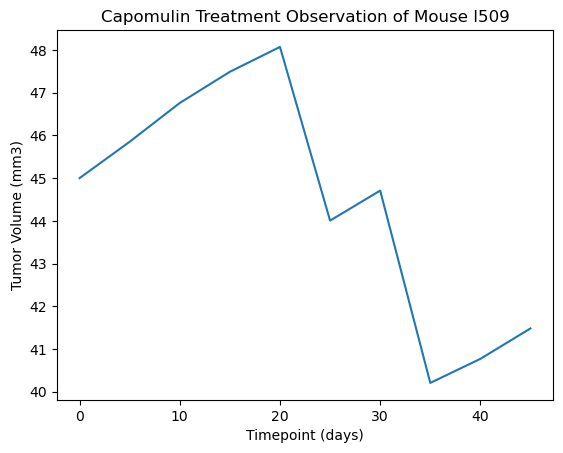

In [18]:
# generate a line plot of tumor volume vs. time point for a single mouse treated with capomulin
# first find a mouse subject to plot
mice_capo = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin"]
mouse_l509 = mice_capo.loc[mice_capo["Mouse ID"] == "l509"]

# generate a line plot of the specific mouse
plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment Observation of Mouse l509")
plt.show()

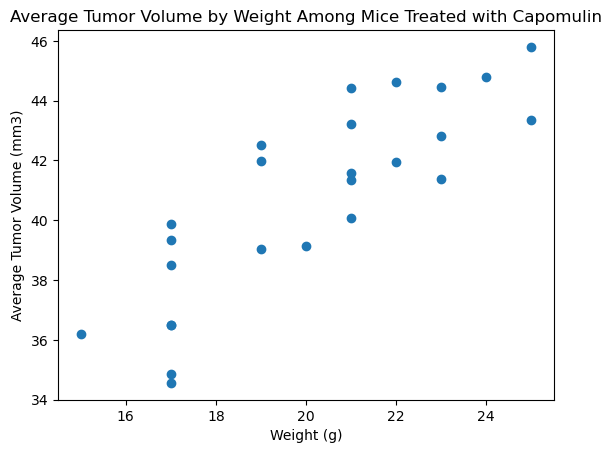

In [19]:
# generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire capomulin regimen

# obtain the average tumor volumes of each mouse treated with caplomulin
avg_tv = pd.DataFrame(mice_capo.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()).rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

# merge the average tumor volume dataset with the original capomulin treated mice dataset
avg_tv = pd.merge(mice_capo, avg_tv, on="Mouse ID")

# drop duplicates and keep the weight and tumor volume columns
avg_tv_wt = avg_tv[["Weight (g)", "Average Tumor Volume (mm3)"]].drop_duplicates()

# generate a scatter plot of weight vs. average tumor volume for the capomulin treated mice
plt.scatter(avg_tv_wt["Weight (g)"],avg_tv_wt["Average Tumor Volume (mm3)"])
plt.title("Average Tumor Volume by Weight Among Mice Treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume of mice treated with Capomulin is 0.84.


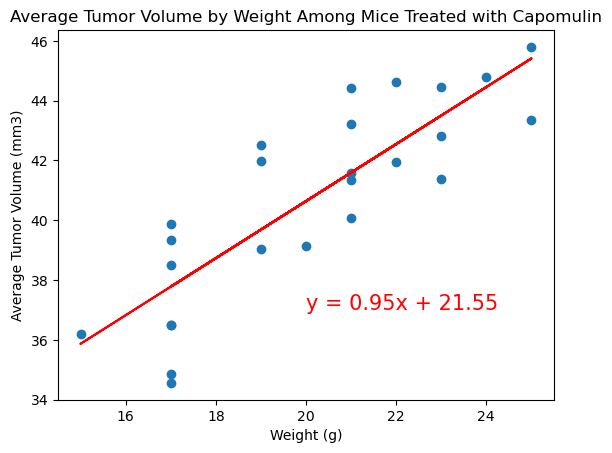

In [20]:
# obtain the correlation coefficient and linear regression model for weight vs. average tumor volume observed for the capomulin group

# first set the x and y values
x = avg_tv_wt["Weight (g)"]
y = avg_tv_wt["Average Tumor Volume (mm3)"]

# calculate the correlation coefficient
correlation = st.pearsonr(x,y)
print(f"The correlation between weight and average tumor volume of mice treated with Capomulin is {round(correlation[0],2)}.")

# calculate linear regression
[m, b, rvalue, pvalue, stderr] = linregress(x, y)
regression = x * m + b
equation = "y = " + str(round(m,2)) + "x + " + str(round(b,2))

# plot linear regression on top of the scatter plot
plt.scatter(x,y)
plt.plot(x,regression,"r-")

# annotate linear regression
plt.annotate(equation,(20,37),fontsize=15,color="red")

# give the figure a title and label the x and y axes
plt.title("Average Tumor Volume by Weight Among Mice Treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()